# Assignment 2- Tissue Image Count Challenge 

This notebook is an attempt on doing the tissue CoNIC challenge, however, due to computational limitation and google collab won't work, this notebook has failed to present a proper model. Notes: I understand that this jupyter notebook was really lengthy and blocky, due to several crashes when working with the codes, hence lengthy code is somewhat useful for the debugging.

In [1]:
#Import Packages and Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.path.abspath("."))

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

#Load Training Images and Labels of Cells, please adjust to local folder where this .ipynb is located.

X = np.load(r'C:\Users\wikara\Documents\images.npy')
Y = pd.read_csv(r'C:\Users\wikara\Documents\counts.csv')
F = np.loadtxt(r'C:\Users\wikara\Documents\split.txt')

print(len(F))

import torch
print(torch.cuda.is_available())

C:\Users\wikara\Documents
4981
True


##### How Many folds? Count the number of folds available on image

In [2]:
type1 = 0;
type2 = 0;
type3 = 0;

for i in range(len(F)):
    if F[i] == 1:
        type1 += 1
    if F[i] == 2:
        type2 += 1
    if F[i] == 3:
        type3 += 1

print(type1,type2,type3)

1622 1751 1608


In [3]:
Y['fold'] = F.tolist()

neutrophil     0.0
epithelial    84.0
lymphocyte     0.0
plasma         0.0
eosinophil     0.0
connective     0.0
fold           3.0
Name: 1700, dtype: float64


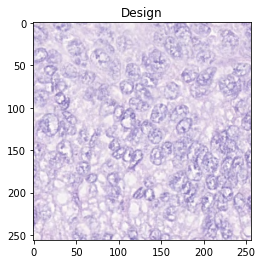

neutrophil     0.0
epithelial    56.0
lymphocyte     0.0
plasma         0.0
eosinophil     0.0
connective     1.0
fold           3.0
Name: 1701, dtype: float64


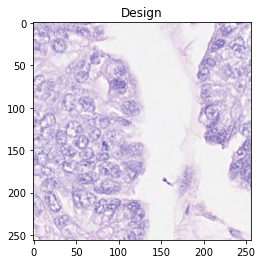

neutrophil     0.0
epithelial    46.0
lymphocyte     1.0
plasma         0.0
eosinophil     0.0
connective     3.0
fold           3.0
Name: 1702, dtype: float64


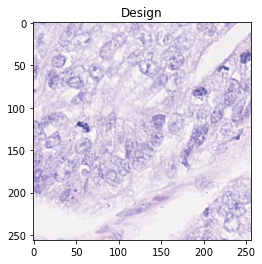

neutrophil     0.0
epithelial    67.0
lymphocyte     1.0
plasma         0.0
eosinophil     0.0
connective     0.0
fold           3.0
Name: 1703, dtype: float64


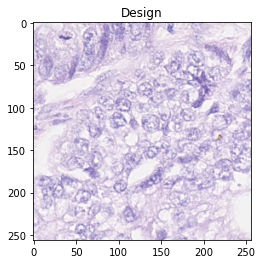

neutrophil     0.0
epithelial    30.0
lymphocyte     0.0
plasma         0.0
eosinophil     0.0
connective     9.0
fold           3.0
Name: 1704, dtype: float64


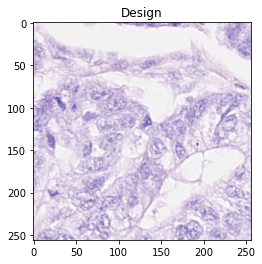

neutrophil      0.0
epithelial      0.0
lymphocyte    450.0
plasma          1.0
eosinophil      0.0
connective      4.0
fold            2.0
Name: 308, dtype: float64


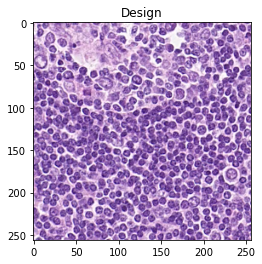

In [4]:
plt.figure()

#Display Random Images 

for i in range(1700,1705):
    plt.imshow(X[i])
    plt.title('Design')
    print(Y.loc[i,:])
    plt.show()
    
plt.imshow(X[308])
plt.title('Design')
print(Y.loc[308,:])
plt.show()

Lymphocyte (T3) cells are a subtype of white blood cell.The lymphocyte cells are shown as a full circle encapsulated inside the cell. The shape of the lymphocyte are shown to be close to a perfect circle, and not having any distortion in the shape. It is quite hard to count them by visual inspection. The index 308 has the maximum count of lymphocyte cells, and it is seen that the shape of the lymphocyte are in purple circles. The task of this regression is to extract the characteristics of an image, and match it with the corresponding cell count.


In [7]:
print(Y['lymphocyte'].idxmax())

308


In [8]:
##### Histogram Plots of Each Cell types

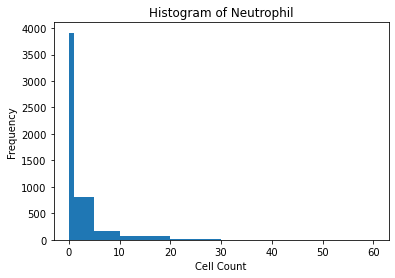

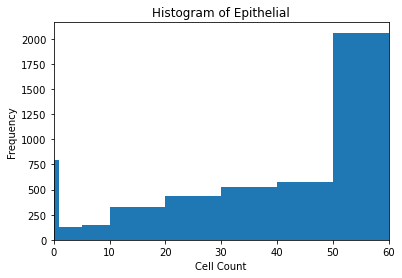

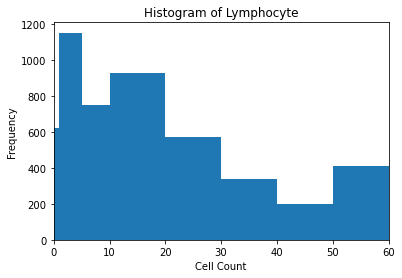

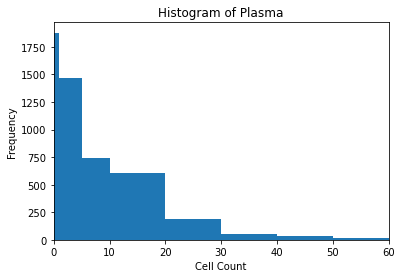

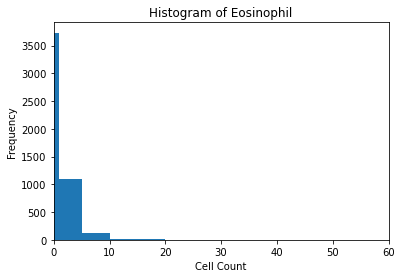

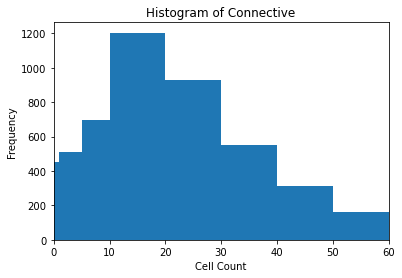

8


In [9]:
plt.hist(Y["neutrophil"], bins=[0, 1, 5, 10, 20, 30, 40, 50, 60])
plt.title("Histogram of Neutrophil")
plt.xlabel("Cell Count")
plt.ylabel("Frequency")
plt.show()
Y["neutrophil"].max()

plt.hist(Y["epithelial"], bins=[0, 1, 5, 10, 20, 30, 40, 50, 253])
plt.title("Histogram of Epithelial")
plt.xlabel("Cell Count")
plt.ylabel("Frequency")
plt.xlim([0, 60])
plt.show()
Y["epithelial"].max()

plt.hist(Y["lymphocyte"], bins=[0, 1, 5, 10, 20, 30, 40, 50, 470])
plt.title("Histogram of Lymphocyte")
plt.xlabel("Cell Count")
plt.ylabel("Frequency")
plt.xlim([0, 60])
plt.show()
Y["lymphocyte"].max()

plt.hist(Y["plasma"], bins=[0, 1, 5, 10, 20, 30, 40, 50, 100])
plt.title("Histogram of Plasma")
plt.xlabel("Cell Count")
plt.ylabel("Frequency")
plt.xlim([0, 60])
plt.show()
Y["plasma"].max()

plt.hist(Y["eosinophil"], bins=[0, 1, 5, 10, 20, 30, 40, 50, 60])
plt.title("Histogram of Eosinophil")
plt.xlabel("Cell Count")
plt.ylabel("Frequency")
plt.xlim([0, 60])
plt.show()
Y["eosinophil"].max()

plt.hist(Y["connective"], bins=[0, 1, 5, 10, 20, 30, 40, 50, 60])
plt.title("Histogram of Connective")
plt.xlabel("Cell Count")
plt.ylabel("Frequency")
plt.xlim([0, 60])
plt.show()
Y["connective"].max()


print(Y["connective"][1])



The following histograms were plot, (note that the value at the bin 50 is 50 and greater), and it could be seen that there are various distributions to the cell counts. For the T3 cell 

##### Convert RGB color to HED

We convert some RGB images to HED Color space

In [10]:
import skimage
from skimage import data
from skimage.color import rgb2hed, hed2rgb

XHED = []
for i in range(0, X.shape[0]):
    XHED.append(rgb2hed(X[i]/255.0))
    
print("conversion complete")

conversion complete


Display several images of HED 

skimage version 0.19.2


<Figure size 432x288 with 0 Axes>

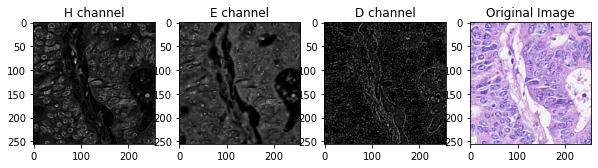

<Figure size 432x288 with 0 Axes>

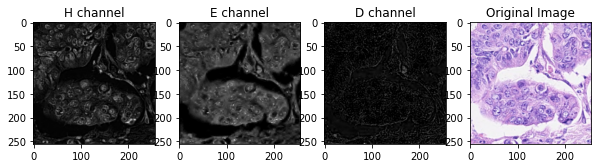

<Figure size 432x288 with 0 Axes>

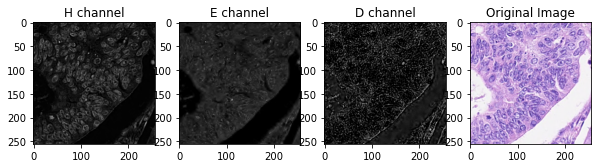

<Figure size 432x288 with 0 Axes>

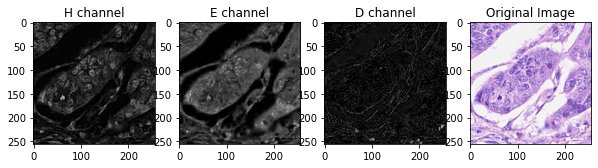

<Figure size 432x288 with 0 Axes>

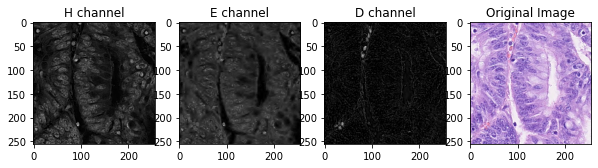

<Figure size 432x288 with 0 Axes>

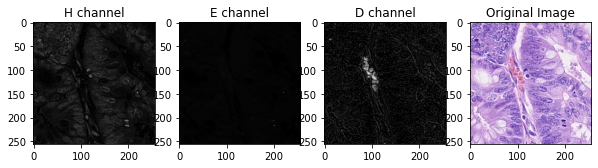

<Figure size 432x288 with 0 Axes>

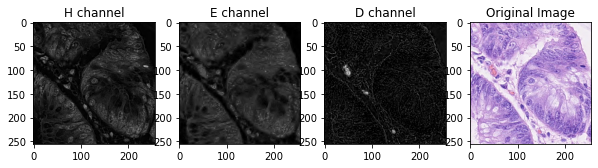

<Figure size 432x288 with 0 Axes>

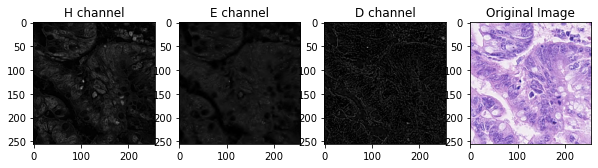

<Figure size 432x288 with 0 Axes>

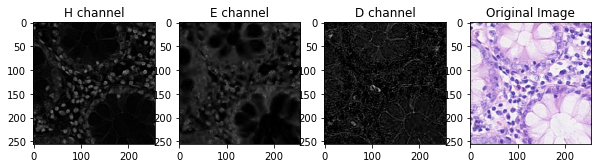

<Figure size 432x288 with 0 Axes>

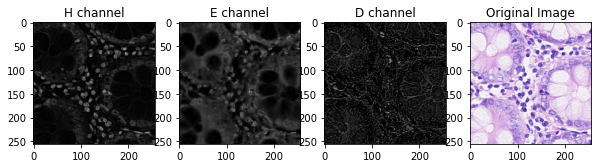

In [11]:
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
print('skimage version',skimage.__version__)
import matplotlib.pyplot as plt

for i in range(10):
    I = X[i]/255.0 #read sample image and rescale pixel range in it
    I_hed = rgb2hed(I) #convert to HED
    #plt.imshow(I);plt.title('Original Image');plt.show()
    
    I_h = I_hed[:,:,0]
    I_e = I_hed[:,:,1]
    I_d = I_hed[:,:,2]
    
    plt.figure()
    fig, axs = plt.subplots(1, 4, figsize=(10, 3)) 
    
    axs[0].imshow(I_h,cmap='gray')
    axs[0].set_title('H channel')
    #axs[0].colorbar()
    axs[1].imshow(I_e,cmap='gray')
    axs[1].set_title('E channel')
    #axs[1].colorbar()
    axs[2].imshow(I_d,cmap='gray')
    axs[2].set_title('D channel')
    #axs[2].colorbar()
    axs[3].imshow(X[i])
    axs[3].set_title('Original Image')
    #axs[3].colorbar()


Count the H values of the images 


In [12]:
print(I_h)

[[0.04571422 0.0224361  0.01547307 ... 0.02072393 0.00993811 0.00782787]
 [0.01742231 0.00718133 0.01583801 ... 0.02339686 0.01544526 0.01660505]
 [0.00977255 0.01049106 0.02433525 ... 0.03144926 0.02647187 0.02830863]
 ...
 [0.02059842 0.01963455 0.00957199 ... 0.09619707 0.08278523 0.0967362 ]
 [0.01370126 0.01500809 0.00402825 ... 0.09948357 0.07899896 0.0729221 ]
 [0.01405407 0.01441345 0.0089848  ... 0.11076804 0.08004037 0.08142309]]


In [13]:
%%time
h_av = []
for i in range(len(XHED)):
    h_av.append(np.mean(XHED[i][:,:,0]))


Wall time: 36.2 s


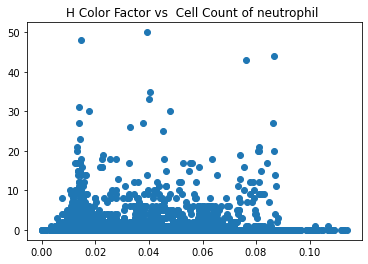

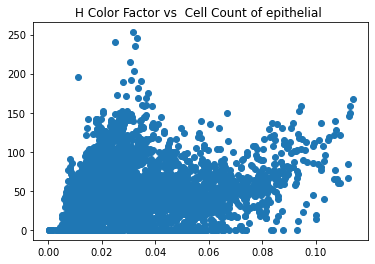

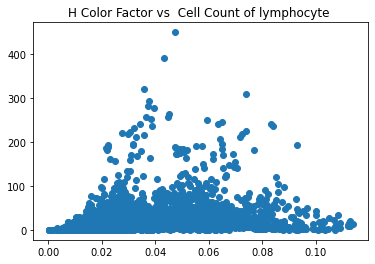

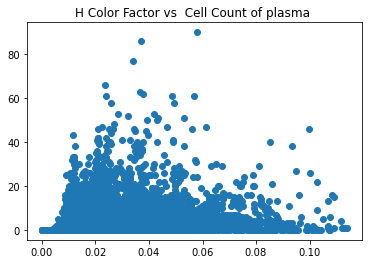

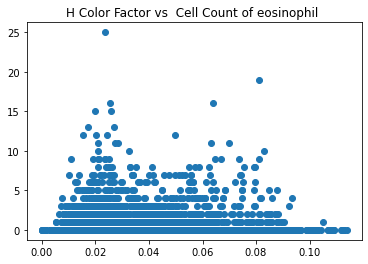

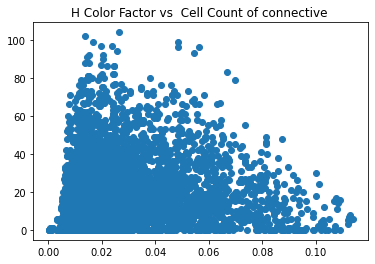

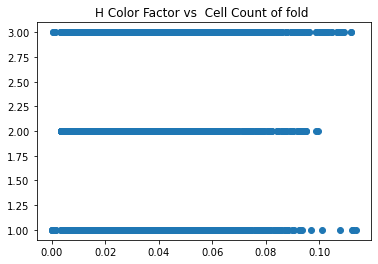

In [14]:
for column in Y:
    
    plt.scatter(h_av, Y[column])
    plt.title("H Color Factor vs  Cell Count of {} ".format(column))
    plt.show()
    

it can be seen that the H color factor against the cell counts results in a various distribution, such as different types of normal distribution. To address this, it might not be able to result any significant relationship available for this type of distribution if we ought to apply a regression problem. In example, for the cell count of Lymphocyite, the H color factor spectrum distribution has a behaviour close to normal distribution. 

### What Performance metrics could be applied to this problem?

Since we are applying a regression problem, one could consider of using MSE, MAE and RMSE as loss functions. For lower values in MSE, MAE, and RMSE, it indicates the better performance of a regression model. In general, RMSE is commonly used for finding correlation of a regression model with other models. Hence this time, RMSE is focused on acessing the models. 

Correlations between data could be applied, such as the pearson correlation and the spearman correlation formula. Pearson correlation formula would find the linearity between two dataset. The spearman correlation finds out the closeness of the dataset, and the spearman correlation value is beneficial for predicted nonlinear relationship between two causes. 

# Question 2 - Extract features from Cell Images and apply Regression 

Text(0.5, 1.0, 'Original Image')

<Figure size 432x288 with 0 Axes>

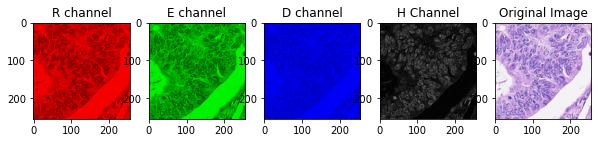

In [15]:
X_Red = []
X_Green = []
X_Blue = []

#Separate Image to different channels of R, G, and B

X_Red = X.copy()
for i in range(len(X_Red)):
    X_Red[i][:,:,1] = 0
    X_Red[i][:,:,2] = 0

X_Blue = X.copy()

for i in range(len(X_Blue)):
    X_Blue[i][:,:,0] = 0
    X_Blue[i][:,:,2] = 0
    

X_Green = X.copy()

for i in range(len(X_Green)):
    X_Green[i][:,:,0] = 0
    X_Green[i][:,:,1] = 0
    

plt.figure()
fig, axs = plt.subplots(1, 5, figsize=(10, 3)) 
    
axs[0].imshow(X_Red[2])
axs[0].set_title('R channel')
axs[1].imshow(X_Blue[2])
axs[1].set_title('E channel')
axs[2].imshow(X_Green[2])
axs[2].set_title('D channel')
axs[3].imshow(XHED[2][:,:,0],cmap='gray')
axs[3].set_title('H Channel')
axs[4].imshow(X[2])
axs[4].set_title('Original Image')

    

Calculate Channel Averages, and find any pattern with distribution, Scatter plot to find any visual intepretation

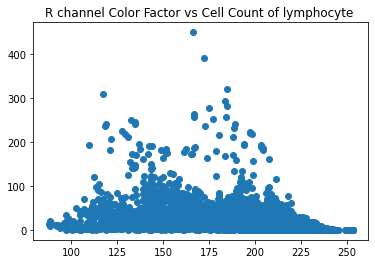

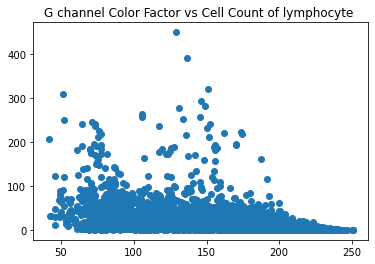

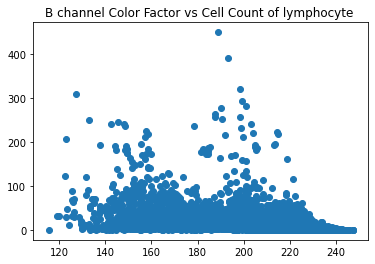

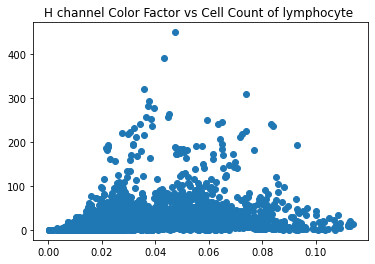

Wall time: 39.1 s


In [16]:
%%time
R_ave = []

#Separate Image to different channels of R, G, and B and H and find their average values of each images 

for i in range(len(X)):
    R_ave.append(np.mean(X[i][:,:,0]))

plt.title("R channel Color Factor vs Cell Count of lymphocyte ")
plt.scatter(R_ave, Y['lymphocyte'])
plt.show()

G_ave = []

for i in range(len(X)):
    G_ave.append(np.mean(X[i][:,:,1]))

plt.title("G channel Color Factor vs Cell Count of lymphocyte ")
plt.scatter(G_ave, Y['lymphocyte'])
plt.show()

B_ave = []

for i in range(len(X)):
    B_ave.append(np.mean(X[i][:,:,2]))

plt.title("B channel Color Factor vs Cell Count of lymphocyte ")
plt.scatter(B_ave, Y['lymphocyte'])
plt.show()

H_ave = []

for i in range(len(X)):
    H_ave.append(np.mean(XHED[i][:,:,0]))

plt.title("H channel Color Factor vs Cell Count of lymphocyte ")
plt.scatter(H_ave, Y['lymphocyte'])
plt.show()



In [38]:
#Aopend To Dataframe
X_features = pd.DataFrame()
 
X_features.insert(0, "R Average", R_ave)
X_features.insert(0, "G Average", G_ave)
X_features.insert(0, "B Average", B_ave)
X_features.insert(0, "H Average", H_ave)

print(X_features)


      H Average   B Average   G Average   R Average
0      0.028605  220.461472  170.029984  197.698242
1      0.026077  222.857880  176.373886  202.473419
2      0.029114  220.063202  170.161255  197.348557
3      0.023964  223.980301  180.647141  205.994827
4      0.033372  214.194946  154.436249  188.374313
...         ...         ...         ...         ...
4976   0.017153  217.049973  172.512909  212.572479
4977   0.020643  209.284439  165.679520  206.418716
4978   0.023952  209.097931  166.652145  202.140808
4979   0.023798  208.633499  164.874191  202.249878
4980   0.023468  210.553970  170.092133  203.599594

[4981 rows x 4 columns]


Calculate Channel Variances, and find any pattern with distribution

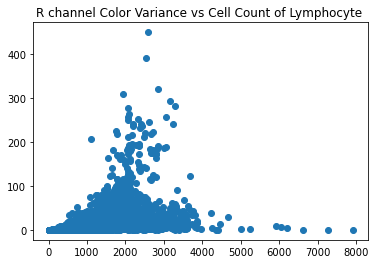

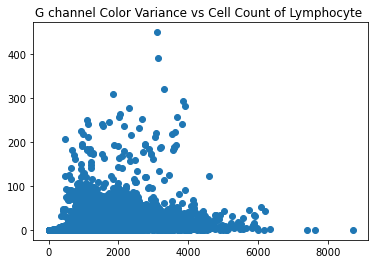

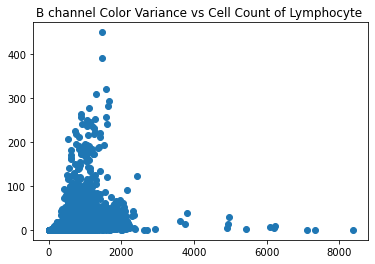

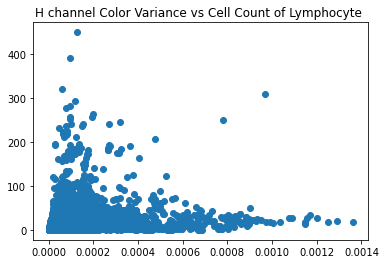

In [18]:
R_var = []

for i in range(len(X)):
    R_var.append(np.var(X[i][:,:,0]))

plt.title("R channel Color Variance vs Cell Count of Lymphocyte ")
plt.scatter(R_var, Y['lymphocyte'])
plt.show()

G_var = []

for i in range(len(X)):
    G_var.append(np.var(X[i][:,:,1]))

plt.title("G channel Color Variance vs Cell Count of Lymphocyte ")
plt.scatter(G_var, Y['lymphocyte'])
plt.show()

B_var = []

for i in range(len(X)):
    B_var.append(np.var(X[i][:,:,2]))

plt.title("B channel Color Variance vs Cell Count of Lymphocyte ")
plt.scatter(B_var, Y['lymphocyte'])
plt.show()

H_var = []

for i in range(len(X)):
    H_var.append(np.var(XHED[i][:,:,1]))

plt.title("H channel Color Variance vs Cell Count of Lymphocyte ")
plt.scatter(H_var, Y['lymphocyte'])
plt.show()





In [39]:
X_features.insert(0, "R Variance", R_var)
X_features.insert(0, "G Variance", G_var)
X_features.insert(0, "B Variance", B_var)
X_features.insert(0, "H Variance", H_var)

print(X_features)


      H Variance   B Variance   G Variance   R Variance  H Average  \
0       0.000035   481.998760  1876.016023  1331.335242   0.028605   
1       0.000045   509.681401  2178.975367  1417.460078   0.026077   
2       0.000046   535.724338  2307.646238  1539.463942   0.029114   
3       0.000058   513.623590  2438.515856  1436.195576   0.023964   
4       0.000037   537.033895  1642.879389  1233.496379   0.033372   
...          ...          ...          ...          ...        ...   
4976    0.000049   580.884420  1629.919114   964.245205   0.017153   
4977    0.000158  1057.736126  3407.630187  1766.249466   0.020643   
4978    0.000180  1211.674858  4087.511367  2090.342844   0.023952   
4979    0.000173  1247.109223  4008.991847  2105.959045   0.023798   
4980    0.000200  1264.357805  4406.558559  2160.485748   0.023468   

       B Average   G Average   R Average  
0     220.461472  170.029984  197.698242  
1     222.857880  176.373886  202.473419  
2     220.063202  170.161255  

Then we analyse the entropy of each of the channel to find if there is any correlation to the image

C:\Users\wikara\AppData\Local\Temp/ipykernel_17536/541116676.py:10: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  X_ent = entropy(X_gray, disk(1))
C:\Users\wikara\AppData\Local\Temp/ipykernel_17536/541116676.py:23: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  Ent_img = entropy(X_gray, disk(D_val))


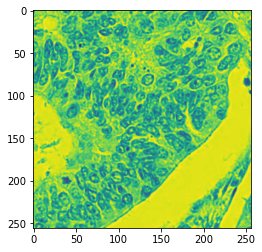

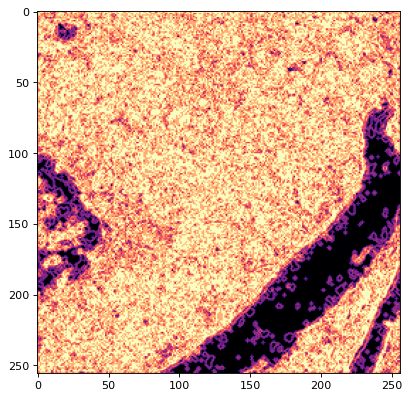

In [21]:
from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv

X_gray = rgb2gray(X_Red[2])
plt.imshow(X_gray);

X_ent = entropy(X_gray, disk(1))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(X_ent, cmap = 'magma');

R_ent = []
G_ent = []
B_ent = []
H_ent = []

D_val = 1

for i in range(len(X)):
    X_Rgray = rgb2gray(X_Red[i])
    Ent_img = entropy(X_gray, disk(D_val))
    R_ent.append(np.mean(Ent_img));
    

Calculation of entropy of each pixel for every image to find the pattern within them. Is done separately due to time taken is quite long

In [22]:
R_ent = []

for i in range(len(X)):
    X_Rgray = rgb2gray(X_Red[i])
    Ent_img = entropy(X_Rgray, disk(D_val))
    R_ent.append(np.mean(Ent_img));

C:\Users\wikara\AppData\Local\Temp/ipykernel_17536/3496145678.py:5: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  Ent_img = entropy(X_Rgray, disk(D_val))


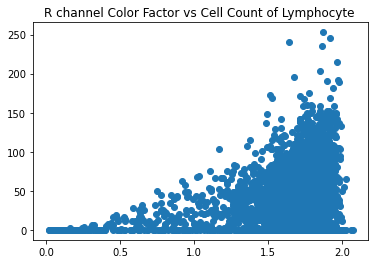

In [219]:
plt.title("R channel Color Factor vs Cell Count of Lymphocyte ")
plt.scatter(R_ent, Y['epithelial'])
plt.show()

In [32]:
G_ent = []

for i in range(len(X)):
    X_Ggray = rgb2gray(X_Green[i])
    Ent_img = entropy(X_Ggray, disk(D_val))
    G_ent.append(np.mean(Ent_img));

C:\Users\wikara\AppData\Local\Temp/ipykernel_17536/3855156084.py:5: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  Ent_img = entropy(X_Ggray, disk(D_val))


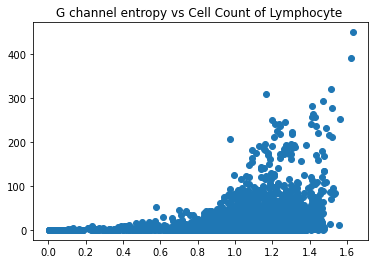

In [33]:
plt.title("G channel entropy vs Cell Count of Lymphocyte ")
plt.scatter(G_ent, Y['lymphocyte'])
plt.show()

In [34]:
%%time
B_ent = []

for i in range(len(X)):
    X_Bgray = rgb2gray(X_Blue[i])
    Ent_img = entropy(X_Bgray, disk(D_val))
    B_ent.append(np.mean(Ent_img));
    

<timed exec>:5: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.


Wall time: 2min 9s


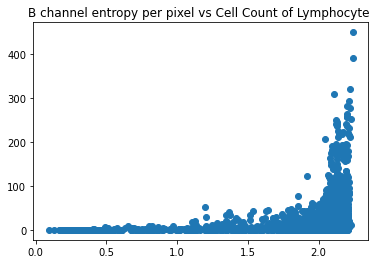

In [35]:
plt.title("B channel entropy per pixel vs Cell Count of Lymphocyte ")
plt.scatter(B_ent, Y['lymphocyte'])
plt.show()

In [23]:
%%time
H_ent = []

for i in range(len(X)):
    Ent_img = entropy(XHED[1][:,:,0], disk(D_val))
    H_ent.append(np.mean(Ent_img));

<timed exec>:4: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.


Wall time: 2min


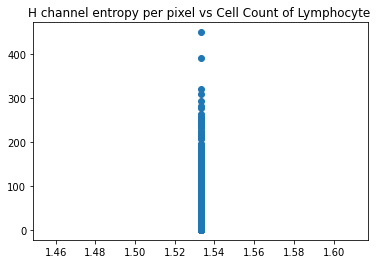

In [36]:
#This regressi
plt.title("H channel entropy per pixel vs Cell Count of Lymphocyte ")
plt.scatter(H_ent, Y['lymphocyte'])
plt.show()

In [40]:
X_features.insert(0, "R Entropy", R_ent)
X_features.insert(0, "G Entropy", G_ent)
X_features.insert(0, "B Entropy", B_ent)
X_features.insert(0, "H Entropy", H_ent)

print(X_features)


      H Entropy  B Entropy  G Entropy  R Entropy  H Variance   B Variance  \
0      1.533065   2.150554   1.247426   1.871827    0.000035   481.998760   
1      1.533065   2.072831   1.148859   1.757885    0.000045   509.681401   
2      1.533065   2.017689   1.178878   1.716650    0.000046   535.724338   
3      1.533065   2.001307   1.065448   1.662547    0.000058   513.623590   
4      1.533065   2.177665   1.358225   1.918437    0.000037   537.033895   
...         ...        ...        ...        ...         ...          ...   
4976   1.533065   2.147170   1.273875   1.827842    0.000049   580.884420   
4977   1.533065   1.930943   1.075760   1.566311    0.000158  1057.736126   
4978   1.533065   1.871210   1.003272   1.490966    0.000180  1211.674858   
4979   1.533065   1.877060   1.115191   1.549242    0.000173  1247.109223   
4980   1.533065   1.758397   0.999725   1.409736    0.000200  1264.357805   

       G Variance   R Variance  H Average   B Average   G Average   R Avera

### Apply PCA

In [226]:
pca = RandomizedPCA(n_components=3)

PCA reduces the dimensionality of data without reducing the variance of the data. PCA helps to extract more feature from smaller values. 

In [27]:
%%time
from sklearn.decomposition import PCA as RandomizedPCA

X_PCAC = []
X_PCAS = []

for i in range(len(X)):
    Xres = X[i].reshape(-1, 3)
    pca = RandomizedPCA(n_components=1, svd_solver='randomized', whiten=True)
    pca.fit(Xres)
    X_PCAC.append(pca.singular_values_)
    
    

Wall time: 2min 33s


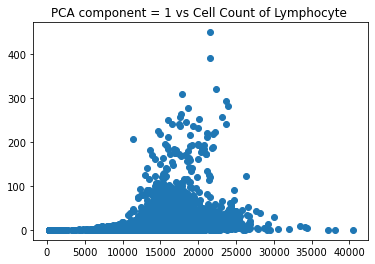

In [41]:
X_PCA = []
for i in range(len(X)):
    X_PCA.append(X_PCAC[i][0])

plt.title("PCA component = 1 vs Cell Count of Lymphocyte ")
plt.scatter(X_PCA, Y['lymphocyte'])
plt.show()

X_features.insert(0, "PCA", X_PCA)


Find Pearson Correlation and Spearman Correlations

In [42]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

Corr = pd.DataFrame()

for column in X_features:
    
    df_corr = pd.DataFrame()
    p_corr, _ = pearsonr(Y['lymphocyte'], X_features[column])
    
    s_corr, _ = spearmanr(Y['lymphocyte'], X_features[column])
    
    df_corr = df_corr.append({'Feature': column,'Spearman': s_corr, 'Pearson': p_corr}, ignore_index=True)
    Corr = Corr.append(df_corr)

print(Corr)

C:\Users\wikara\Anakonda\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\wikara\Anakonda\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


      Feature  Spearman   Pearson
0         PCA  0.514568  0.284261
0   H Entropy       NaN       NaN
0   B Entropy  0.338679  0.196557
0   G Entropy  0.302629  0.258602
0   R Entropy  0.443805  0.257502
0  H Variance  0.491322  0.157667
0  B Variance  0.552992  0.242062
0  G Variance  0.358793  0.128848
0  R Variance  0.646004  0.401639
0   H Average  0.567887  0.331016
0   B Average -0.579381 -0.375746
0   G Average -0.580682 -0.385670
0   R Average -0.573676 -0.360468


As we can see, there are no significant correlation that occurs to the features, hence the feature with the largest correlation is R Variance

GLCM Features extraction, extracting the intensity of greyscale points and find correlation by distance and angles. 

In [324]:
#Compute GLCM Properties

from skimage.filters import sobel
from skimage.feature  import graycomatrix, graycoprops
from skimage import data, color#
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from scipy.stats import spearmanr

import cv2

SIZE = 128

X_128 = []

GLCM_Data = pd.DataFrame()

for i in range(len(X)):
    
    #Resize to reduce computing complexity
    img_temp = cv2.resize(X[i], (SIZE,SIZE))
    imgray = cv2.cvtColor(img_temp, cv2.COLOR_BGR2GRAY)
    
    df = pd.DataFrame()
    
    GLCM = graycomatrix(imgray, [1], [0])       
    GLCM_Energy = graycoprops(GLCM, 'energy')[0]
    df['Energy'] = GLCM_Energy
    GLCM_corr = graycoprops(GLCM, 'correlation')[0]
    df['Corr'] = GLCM_corr       
    GLCM_diss = graycoprops(GLCM, 'dissimilarity')[0]
    df['Diss_sim'] = GLCM_diss       
    GLCM_hom = graycoprops(GLCM, 'homogeneity')[0]
    df['Homogen'] = GLCM_hom       
    GLCM_contr = graycoprops(GLCM, 'contrast')[0]
    df['Contrast'] = GLCM_contr
    
    #Append Data to initial DataFrame
    GLCM_Data = GLCM_Data.append(df)

GLCM_col = ['energy', 'correlation', 'dissimilarity', 'homogenity','contrast']

for column in GLCM_Data: 
    corr, _ = pearsonr(Y['lymphocyte'], GLCM_Data[column])
    print('Pearsons correlation: %.3f' % corr)
    print('Feature {}' .format(column))
    
    corr, _ = spearmanr(Y['lymphocyte'], GLCM_Data[column])
    print('Spearmans correlation: %.3f' % corr)
    print('Feature {}' .format(column))
    
    

Pearsons correlation: -0.171
Feature Energy
Spearmans correlation: -0.573
Feature Energy
Pearsons correlation: 0.035
Feature Corr
Spearmans correlation: 0.151
Feature Corr
Pearsons correlation: 0.383
Feature Diss_sim
Spearmans correlation: 0.447
Feature Diss_sim
Pearsons correlation: -0.213
Feature Homogen
Spearmans correlation: -0.431
Feature Homogen
Pearsons correlation: 0.427
Feature Contrast
Spearmans correlation: 0.457
Feature Contrast


GLCM application was tried, however, no significant result is shown 

##### Split Models into three folds for training and testing 33:66
##### Prepare training datas within Folds 3 for testing, and Fold 1 & 2 combined for training data

In [28]:
FOLD1 = Y[Y.fold == 1]
FOLD2 = Y[Y.fold == 2]
FOLD3= Y[Y.fold == 3]
FOLD1 = FOLD1.append(FOLD2)
FOLD1 = FOLD1.reset_index(drop=True)

print(FOLD1)

      neutrophil  epithelial  lymphocyte  plasma  eosinophil  connective  fold
0              0          54           4       7           0          12   1.0
1              0          95           2       4           0           5   1.0
2              0         101          14      13           3          25   1.0
3              0          14           7       3           1          34   1.0
4              0           0           0       0           0           2   1.0
...          ...         ...         ...     ...         ...         ...   ...
3368           0          77           2       0           0           2   2.0
3369           0         107           1       0           0          12   2.0
3370           0         138           1       1           0           3   2.0
3371           0         110           1       0           0          12   2.0
3372           0         110           1       0           0          12   2.0

[3373 rows x 7 columns]


In [47]:
X_features['fold'] = F.tolist()

X_FOLD1 = X_features[X_features.fold == 1]
X_FOLD2 = X_features[X_features.fold == 2]
X_Test  = X_features[X_features.fold == 3]

X_FOLD1 = X_FOLD1.append(X_FOLD2)
FOLD1 = FOLD1.reset_index(drop=True)


### Ordinary Least Squares Training and Testing (Regression)

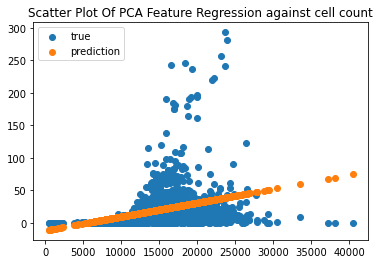

C:\Users\wikara\Anakonda\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\wikara\Anakonda\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


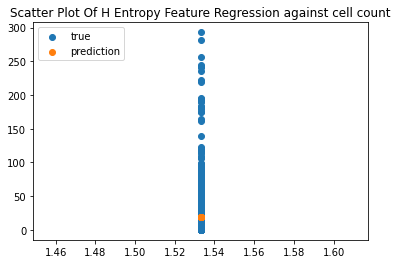

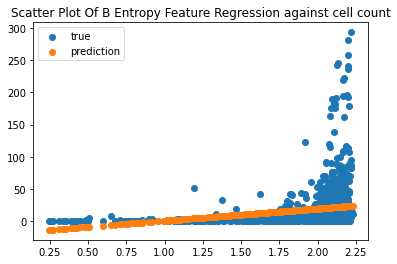

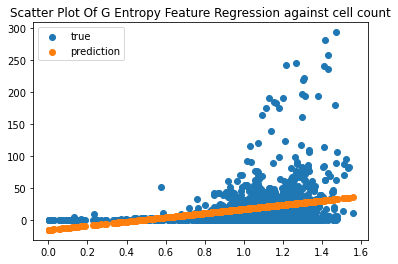

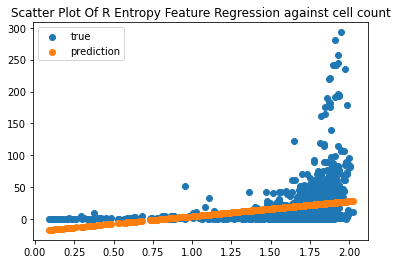

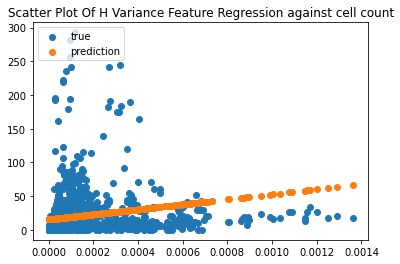

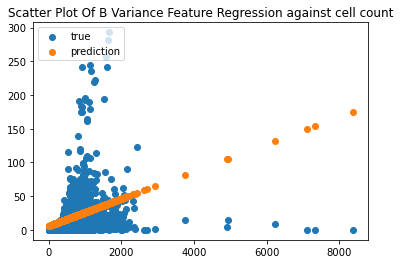

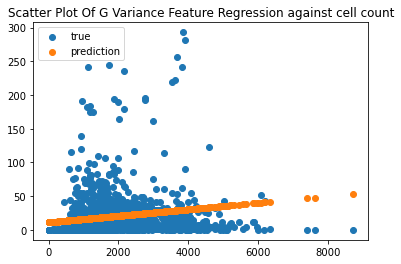

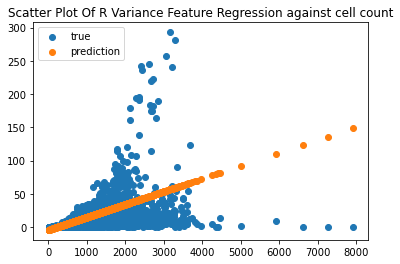

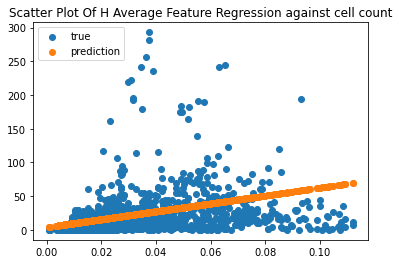

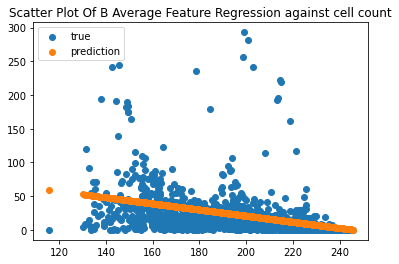

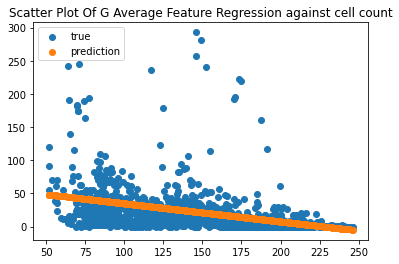

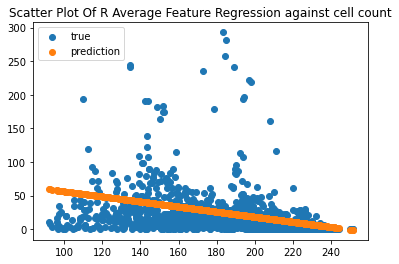

C:\Users\wikara\Anakonda\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\wikara\Anakonda\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


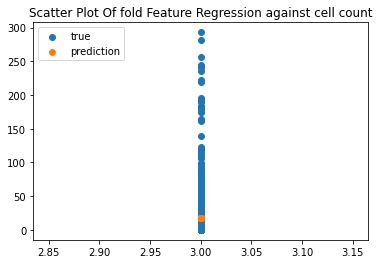

      Feature        MAE         MSE       RMSE        R2     Pcorr     Scorr
0         PCA  17.535639  839.294157  28.970574  0.038734  0.260311  0.476896
0   H Entropy  18.208803  883.518840  29.724045 -0.011917       NaN       NaN
0   B Entropy  17.614581  851.452779  29.179664  0.024809  0.189969  0.266984
0   G Entropy  17.388898  826.294445  28.745338  0.053623  0.253526  0.267506
0   R Entropy  17.443654  824.594133  28.715747  0.055571  0.260309  0.424259
0  H Variance  18.060871  877.790638  29.627532 -0.005357  0.130410  0.516482
0  B Variance  17.907373  889.319148  29.821454 -0.018561  0.210355  0.549065
0  G Variance  18.340659  885.396675  29.755616 -0.014068  0.095060  0.324531
0  R Variance  16.795891  817.106078  28.585067  0.064147  0.370780  0.603666
0   H Average  16.908422  822.889864  28.686057  0.057523  0.319143  0.595611
0   B Average  15.646418  757.046171  27.514472  0.132935  0.400525  0.648539
0   G Average  15.723858  764.133283  27.642961  0.124818  0.386

In [63]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

reg = LinearRegression()
Eval = pd.DataFrame()

for column in  X_features:
    Xtrained = X_FOLD1[column]

    #Reshape data if necessary
    
    metric = pd.DataFrame()
    
    #Training data u can use R_ave, G_ave, B_ave, H_ave, R_var, G_var, B_var, H_var etc
    reg.fit(X_FOLD1[column].values.reshape(-1,1), FOLD1['lymphocyte'])

    y_pred = reg.predict(X_Test[column].values.reshape(-1,1))
    y_test = FOLD3['lymphocyte']
    
    #Metrics for evaluations
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = r2_score(y_test, y_pred)
    Pcorr, _ = pearsonr(y_test, y_pred)
    Scorr, _ = spearmanr(y_test, y_pred)

    metric = metric.append({'Feature': column,'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE, 'R2': R2, 'Pcorr': Pcorr, 'Scorr': Scorr}, ignore_index=True)
            
    Eval = Eval.append(metric)
    
    
    #Plot Graph
    plt.title("Scatter Plot Of {} Feature Regression against cell count".format(column))
    plt.scatter(X_Test[column], y_test, label='true')
    plt.scatter(X_Test[column], y_pred, label='prediction')
    plt.legend(loc='upper left')
    plt.show()
    
    #print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    #print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    #print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
                   
print(Eval)


For OLS regression model, the lower values of MAE and RMSE, shows better performance for the model. It can be seen that for OLS Regression, the best performing feature is average B Color Matrix, and G Color Matrix for RMSE. Additionally, the Spearman Correlation is the highest for B average. As we can see, all of the graphs of the linear regression fit visually has no correlation. However, it seemed that there is no significant feature we could extract for this regression model. onto the next one.

### Standard Vector Regression Training and Testing

From trial and error, the optimum value 

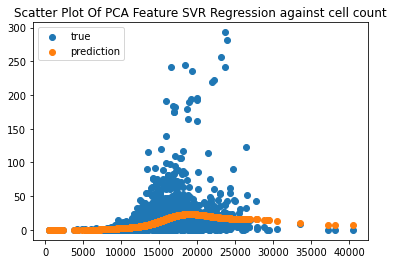

C:\Users\wikara\Anakonda\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\wikara\Anakonda\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


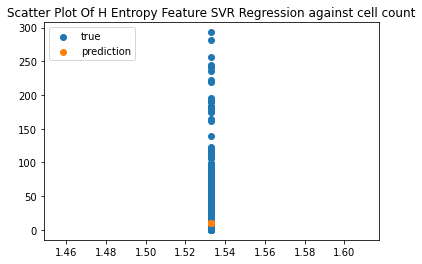

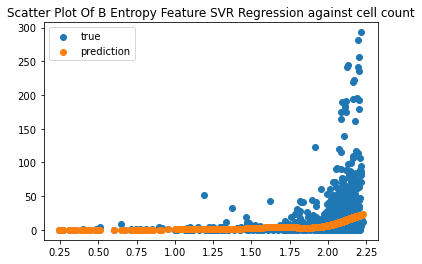

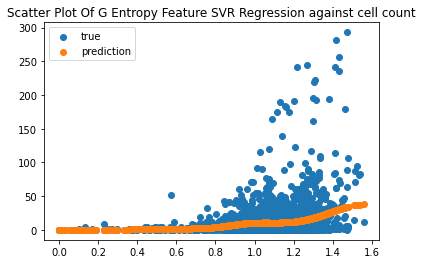

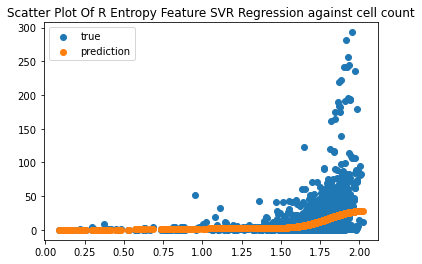

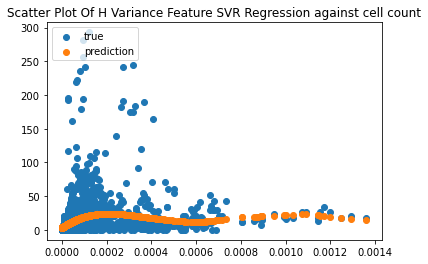

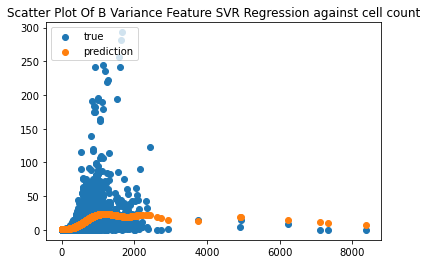

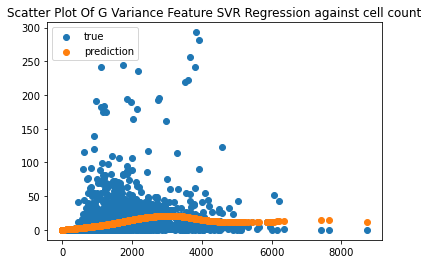

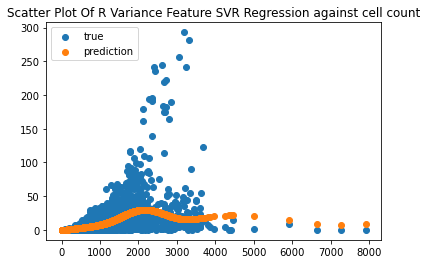

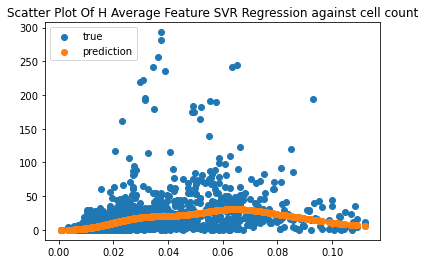

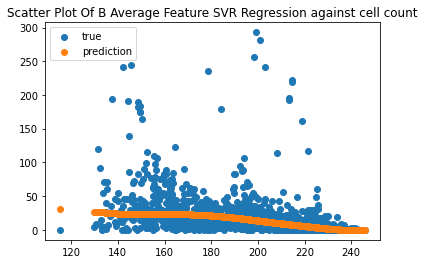

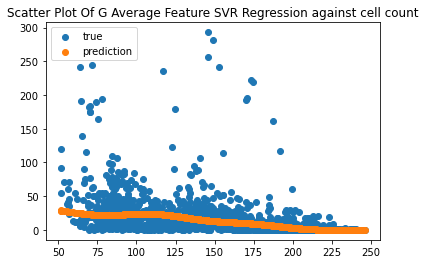

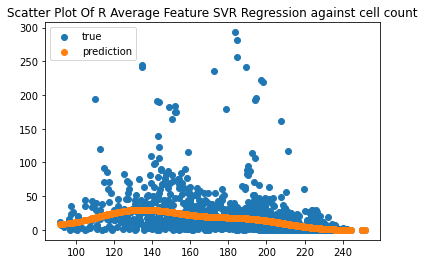

C:\Users\wikara\Anakonda\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\wikara\Anakonda\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


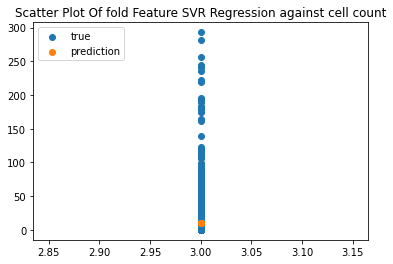

      Feature        MAE         MSE       RMSE        R2     Pcorr     Scorr
0         PCA  13.639132  809.886986  28.458513  0.072415  0.306920  0.500350
0   H Entropy  14.987408  916.389542  30.271927 -0.049565       NaN       NaN
0   B Entropy  14.399017  841.068958  29.001189  0.036702  0.255999  0.262636
0   G Entropy  14.372181  822.536667  28.679900  0.057927  0.307462  0.273868
0   R Entropy  13.779873  772.695822  27.797407  0.115011  0.388267  0.424260
0  H Variance  14.128056  802.876170  28.335070  0.080445  0.318410  0.528326
0  B Variance  13.372634  778.823611  27.907411  0.107993  0.360497  0.563843
0  G Variance  14.338543  887.521274  29.791295 -0.016501  0.140493  0.354902
0  R Variance  13.021366  747.652041  27.343227  0.143694  0.397545  0.614501
0   H Average  12.939459  754.025580  27.459526  0.136395  0.395285  0.608056
0   B Average  12.454294  775.380640  27.845657  0.111936  0.372551  0.642810
0   G Average  12.934444  782.031199  27.964821  0.104319  0.352

In [62]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

SVR_Eval = pd.DataFrame()

for column in  X_features:
    
    #Prepare the dataframe 
    metric = pd.DataFrame()
    
    #Prepare the folds 
    X = X_FOLD1[column].values.reshape(-1,1)
    Y = FOLD1['lymphocyte'].values.reshape(-1,1)
    X_T = X_Test[column].values.reshape(-1,1)

    sc_X = StandardScaler()
    sc_y = StandardScaler()
    
    #Train the Images
    X_train = sc_X.fit_transform(X)
    y_train = sc_y.fit_transform(Y)
    X_TSC = sc_X.fit_transform(X_T)
    
    
    SVReg = SVR(kernel = 'rbf', C=000.1, epsilon=0.001)
    SVReg.fit(X_train, y_train.ravel())

    y_pred = SVReg.predict(X_TSC)
    y_pred = sc_y.inverse_transform(y_pred)
    y_test = FOLD3['lymphocyte'].tolist()
    

    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = r2_score(y_test, y_pred)
    Pcorr, _ = pearsonr(y_test, y_pred)
    Scorr, _ = spearmanr(y_test, y_pred)
    
    metric = metric.append({'Feature': column,'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE, 'R2': R2, 'Pcorr': Pcorr, 'Scorr': Scorr}, ignore_index=True)
    
    SVR_Eval = SVR_Eval.append(metric)
    
    #Plot Graph 
    plt.title("Scatter Plot Of {} Feature SVR Regression against cell count".format(column))
    plt.scatter(X_Test[column], y_test, label='true')
    plt.scatter(X_Test[column], y_pred, label='prediction')
    plt.legend(loc='upper left')
    plt.show()
    
    
print(SVR_Eval)


For the SVR regression model, it can be seen that the R average has the least MSE, and also highest values for R2. However, thinking the MSE values, it is still quite big. It is noted also that the Spearman Correlation for B average feature is  the highest. , however. it is hard to consider that this model could be a standard for predicting cell count. 

#### Table.1 Selecrted Feature Comparison 

|Feature| MODEL | RMSE  | Pearson | Spearman|  R2 |
| --- | --- | --- | --- | --- | --- | 
| R Average | SVR | 27.42 | 0.402 | 0.636 | 0.132 |
| B Average | SVR | 27.84 | 0.372 | 0.642 | 0.111 |
| B Average | Reg | 27.52 | 0.400 | 0.648 | 0.132 |


Table1 shows the best performing models with highest correlations and lowest RMSE values throughout other features. However, such quantitative values of the image apparently is not enough to predict satisfactory results of 

# 3. Creating A CNN Model to train and test data

To implement a regression problem to a image-trained CNN, one should think of matching the images with the corresponding labels of the cell count. predictably, similar images in the test will have similarities with the trained image, alias the count will be similar. Hence it seemed like it is a regression problem. 

In [5]:
#Import AgainPackages and Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.path.abspath("."))

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

X = np.load(r'C:\Users\wikara\Documents\images.npy')
Y = pd.read_csv(r'C:\Users\wikara\Documents\counts.csv')
F = np.loadtxt(r'C:\Users\wikara\Documents\split.txt')


Y['fold'] = F.tolist()

C:\Users\wikara\Documents


In [6]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import sklearn
from sklearn import metrics
from sklearn.metrics import r2_score#
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')

## CNN Starts here

In [8]:
#FOLDS initialisation

FOLD1 = Y[Y.fold == 1]
FOLD2 = Y[Y.fold == 2]
FOLD3= Y[Y.fold == 3]
FOLD1 = FOLD1.append(FOLD2)
FOLD1 = FOLD1.reset_index(drop=True)



In [6]:
#APPLY basic transforms, however this seemed to fail, so it is not used, dont run

data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.225, 0.225, 0.225], [0.225, 0.225, 0.225])
        ])

X_TRANS = []
for i in range(len(X)):
    image = Image.fromarray(X[i])
    image = data_transform(image)
    X_TRANS.append(image)

NameError: name 'transforms' is not defined

Prepare data for training, use 1st and  2nd fold to train, 3rd fold for testing, important cell for indexing

In [9]:
%%time
from torch.utils.data import TensorDataset, DataLoader
concat = []

concat.append(X)
concat.append(F)

index = []

i_one = np.argwhere(F==1); i_two = np.argwhere(F==2); i_tre = np.argwhere(F==3)
index.append(i_one[:,0]); index.append(i_two[:,0]); index.append(i_tre[:,0])

XFOLD12 = []
YFOLD12 =[]

XTEST3 = []
YTEST3 =[]

T3 = []

for i in range (0,X.shape[0]):
    T3.append(Y['lymphocyte'][i])
    
for i in index[0]:
    XFOLD12.append(X[i]); YFOLD12.append(T3[i])

for i in index[1]:
    XFOLD12.append(X[i]); YFOLD12.append(T3[i])

for i in index[2]:
    XTEST3.append(X[i]); YTEST3.append(T3[i])
    

Wall time: 17 ms


In [9]:
%%time
a = torch.FloatTensor(XFOLD12)
a = a.transpose(1,3)
b = torch.LongTensor(YFOLD12)

train_ids = TensorDataset(a, b)
train_loader = DataLoader(dataset=train_ids, batch_size = 100, shuffle = True)


Wall time: 2min 28s


<timed exec>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:210.)


In [10]:
%%time

k = torch.FloatTensor(XTEST3)
k = k.transpose(1,3)
j = torch.LongTensor(YTEST3)

test_ids = TensorDataset(k, j)
test_loader = DataLoader(dataset=test_ids, batch_size = 100, shuffle = True)


Wall time: 1min 15s


##This is the CNN designed, it is designed deep with trial and error. This is developped from two convolutional layer, and a naive intuition is that the deeper the layer, it would lead to more personalised values.

In [10]:
# Hyper parameters, estimate epoch from the approximated loss
num_epochs = 20
num_classes = 451
batch_size = 128
learning_rate = 0.001

# Convolutional neural network (two convolutional layers), set classes to train data of 155
class ConvNet(nn.Module):
    def __init__(self, num_classes=451):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(4096, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)


In [30]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Loss = []

# Function to Train the Model
def model_training(train_data):
    total_step = len(train_data)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_data):
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            print(i)
            
            Loss.append(loss.item())

            if (i+1) % 10 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        
    #Plot the function 
    
    plt.title('Loss vs Iteration')
    plt.plot(Loss)
    plt.xlabel("Loss")
    plt.ylabel("iteration")


0
1
2
3
4
5
6
7
8
9
Epoch [1/20], Step [10/34], Loss: 4.1048
10
11
12
13
14
15
16
17
18
19
Epoch [1/20], Step [20/34], Loss: 3.8318
20
21
22
23
24
25
26
27
28
29
Epoch [1/20], Step [30/34], Loss: 4.0593
30
31
32
33
0
1
2
3
4
5
6
7
8
9
Epoch [2/20], Step [10/34], Loss: 3.6922
10
11
12
13
14
15
16
17
18
19
Epoch [2/20], Step [20/34], Loss: 3.7373
20
21
22
23
24
25
26
27
28
29
Epoch [2/20], Step [30/34], Loss: 3.3208
30
31
32
33
0
1
2
3
4
5
6
7
8
9
Epoch [3/20], Step [10/34], Loss: 3.1487
10
11
12
13
14
15
16
17
18
19
Epoch [3/20], Step [20/34], Loss: 3.4624
20
21
22
23
24
25
26
27
28
29
Epoch [3/20], Step [30/34], Loss: 3.3181
30
31
32
33
0
1
2
3
4
5
6
7
8
9
Epoch [4/20], Step [10/34], Loss: 2.7863
10
11
12
13
14
15
16
17
18
19
Epoch [4/20], Step [20/34], Loss: 3.0040
20
21
22
23
24
25
26
27
28
29
Epoch [4/20], Step [30/34], Loss: 3.3398
30
31
32
33
0
1
2
3
4
5
6
7
8
9
Epoch [5/20], Step [10/34], Loss: 3.0593
10
11
12
13
14
15
16
17
18
19
Epoch [5/20], Step [20/34], Loss: 2.9485
20
21
22

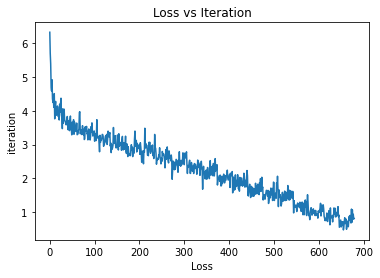

In [16]:
model_training(train_loader)

Text(0, 0.5, 'iteration')

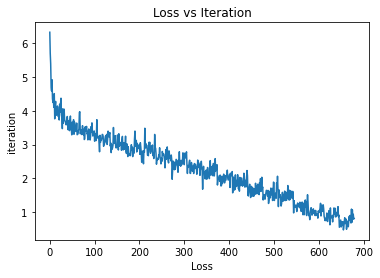

In [20]:
plt.title('Loss vs Iteration')
plt.plot(Loss)
plt.xlabel("Loss")
plt.ylabel("iteration")

In [16]:
# Test the model

tempor = []
def model_testing(test_data):
    model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_data:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            tempor.append(predicted)

        print('Test Accuracy of the model on the test images: {} %'.format(100 * correct / total))

    # Save the model checkpoint
    torch.save(model.state_dict(), 'model.ckpt')

In [19]:
model_testing(test_loader)


Test Accuracy of the model on the test images: 16.97761194029851 %


Pearson, RMSE, S_corr, R2
0.026254194793614224 38.3084009336014 0.008133881713977956 -1.316970777798434


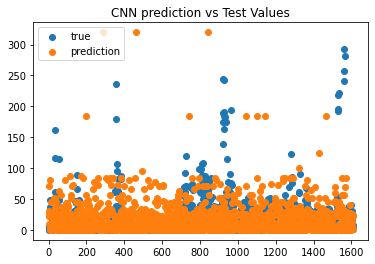

In [38]:


#Evaluate training with models 
y_pred = []
for i in range(len(tempor)):
    y_pred.extend(tempor[i].tolist())

RMSE = np.sqrt(metrics.mean_squared_error(y_pred, YTEST3))
p_corr, _ = pearsonr(y_pred, YTEST3)
s_corr, _ = spearmanr(y_pred, YTEST3)
R2 = sklearn.metrics.r2_score(y_pred, YTEST3)

print('Pearson, RMSE, S_corr, R2')
print(p_corr,RMSE,s_corr,R2)

x_axis = np.linspace(0,len(YTEST3),1608)

plt.title("CNN prediction vs Test Values Fold 3")
plt.scatter(x_axis,YTEST3, label='true')
plt.scatter(x_axis,y_pred, label='prediction')
plt.legend(loc='upper left')
plt.show()

In here we could conclude that the model is not working properly with only guessing 16.97% of the labels, however, this is somewhat likely the performance of the cnn, due to it is slightly similar to regression problem. Preprocessing technique must be considered, such as using PCA, Grayscale Implementation, and other more feature extraction to help showing better features for the data. 

# Run Train and Test on Other 2 Folds

### Prepare Data for Folds, to test Fold 2

In [39]:
%%time

# T3 count Y Axis Preparation
T3 = [] 

for i in range (0,X.shape[0]):
    T3.append(Y['lymphocyte'][i])

# Fold Data Count Preparation
XFOLD13 = []
YFOLD13 =[]
    
for i in index[0]:
    XFOLD13.append(X[i])
    YFOLD13.append(T3[i])

for i in index[2]:
    XFOLD13.append(X[i])
    YFOLD13.append(T3[i])
    
XTEST2 = []
YTEST2 =[]

for i in index[1]:
    XTEST2.append(X[i])
    YTEST2.append(T3[i])

print(len(YFOLD13))

3230
Wall time: 22.9 ms


Dataloaders are heavy, i had to reset a kernel everytime i wanted to test new Folds to train with my neural network

In [40]:
%%time

a = torch.FloatTensor(XFOLD13)
a = a.transpose(1,3)
b = torch.LongTensor(YFOLD13)

train_ids_13 = TensorDataset(a, b)
train_loader_13 = DataLoader(dataset=train_ids_13, batch_size = 100, shuffle = True)

Wall time: 2min 12s


In [41]:
%%time

k = torch.FloatTensor(XTEST2)
k = k.transpose(1,3)
j = torch.LongTensor(YTEST2)

test_ids_2 = TensorDataset(k, j)
test_loader_2 = DataLoader(dataset=test_ids_2, batch_size = 100, shuffle = True)

Wall time: 1min 12s


0
1
2
3
4
5
6
7
8
9
Epoch [1/20], Step [10/33], Loss: 4.5017
10
11
12
13
14
15
16
17
18
19
Epoch [1/20], Step [20/33], Loss: 3.8339
20
21
22
23
24
25
26
27
28
29
Epoch [1/20], Step [30/33], Loss: 3.5757
30
31
32
0
1
2
3
4
5
6
7
8
9
Epoch [2/20], Step [10/33], Loss: 3.7884
10
11
12
13
14
15
16
17
18
19
Epoch [2/20], Step [20/33], Loss: 3.6015
20
21
22
23
24
25
26
27
28
29
Epoch [2/20], Step [30/33], Loss: 3.5861
30
31
32
0
1
2
3
4
5
6
7
8
9
Epoch [3/20], Step [10/33], Loss: 3.6609
10
11
12
13
14
15
16
17
18
19
Epoch [3/20], Step [20/33], Loss: 3.3856
20
21
22
23
24
25
26
27
28
29
Epoch [3/20], Step [30/33], Loss: 3.7340
30
31
32
0
1
2
3
4
5
6
7
8
9
Epoch [4/20], Step [10/33], Loss: 3.4188
10
11
12
13
14
15
16
17
18
19
Epoch [4/20], Step [20/33], Loss: 3.4250
20
21
22
23
24
25
26
27
28
29
Epoch [4/20], Step [30/33], Loss: 3.1230
30
31
32
0
1
2
3
4
5
6
7
8
9
Epoch [5/20], Step [10/33], Loss: 3.1957
10
11
12
13
14
15
16
17
18
19
Epoch [5/20], Step [20/33], Loss: 3.3610
20
21
22
23
24
25
26

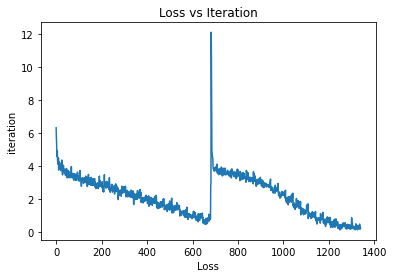

In [42]:
model_training(train_loader_13)

Text(0, 0.5, 'iteration')

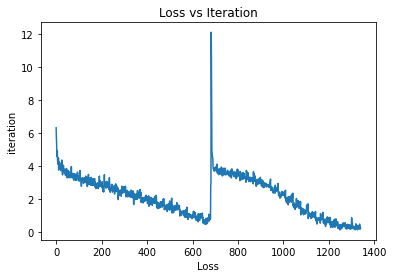

In [52]:
plt.title('Loss vs Iteration')
plt.plot(Loss)
plt.xlabel("Loss")
plt.ylabel("iteration")

In [48]:
#Reset output array
tempor = []
model_testing(test_loader_2)

Test Accuracy of the model on the test images: 14.106225014277555 %


Pearson, RMSE, S_corr, R2
-0.01324006584302431 39.11617805325571 0.001962367294851285 -3.0224194247350393


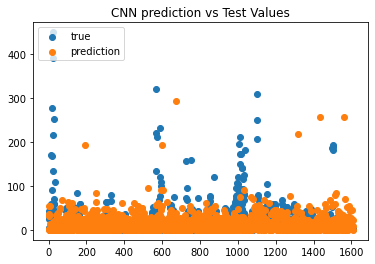

In [51]:
#Evaluate training with models 
y_pred = []
for i in range(len(tempor)):
    y_pred.extend(tempor[i].tolist())

RMSE = np.sqrt(metrics.mean_squared_error(y_pred, YTEST2))
p_corr, _ = pearsonr(y_pred, YTEST2)
s_corr, _ = spearmanr(y_pred, YTEST2)
R2 = sklearn.metrics.r2_score(y_pred, YTEST2)

print('Pearson, RMSE, S_corr, R2')
print(p_corr,RMSE,s_corr,R2)

#Plot Graph 

x_axis = np.linspace(0,len(YTEST3),1751)

plt.title("CNN prediction vs Test Values Fold 2")
plt.scatter(x_axis,YTEST2, label='true')
plt.scatter(x_axis,y_pred, label='prediction')
plt.legend(loc='upper left')
plt.show()

it could be seen that the prediction values are trying to catch with test values

### Prepare Data for Folds, to test Fold 1

In [10]:
%%time

# T3 count Y Axis Preparation
T3 = [] 

for i in range (0,X.shape[0]):
    T3.append(Y['lymphocyte'][i])

# Fold Data Count Preparation
XFOLD23 = []
YFOLD23 =[]
    
for i in index[1]:
    XFOLD23.append(X[i])
    YFOLD23.append(T3[i])

for i in index[2]:
    XFOLD23.append(X[i])
    YFOLD23.append(T3[i])
    
XTEST1 = []
YTEST1 =[]

for i in index[0]:
    XTEST1.append(X[i])
    YTEST1.append(T3[i])


Wall time: 15.9 ms


In [11]:
%%time

a = torch.FloatTensor(XFOLD23)
a = a.transpose(1,3)
b = torch.LongTensor(YFOLD23)

train_ids_23 = TensorDataset(a, b)
train_loader_23 = DataLoader(dataset=train_ids_23, batch_size = 100, shuffle = True)

Wall time: 2min 14s


<timed exec>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:210.)


In [12]:
%%time

k = torch.FloatTensor(XTEST1)
k = k.transpose(1,3)
j = torch.LongTensor(YTEST1)

test_ids_1 = TensorDataset(k, j)
test_loader_1 = DataLoader(dataset=test_ids_1, batch_size = 100, shuffle = True)

Wall time: 1min 5s


0
1
2
3
4
5
6
7
8
9
Epoch [1/20], Step [10/34], Loss: 4.5822
10
11
12
13
14
15
16
17
18
19
Epoch [1/20], Step [20/34], Loss: 3.5420
20
21
22
23
24
25
26
27
28
29
Epoch [1/20], Step [30/34], Loss: 3.4911
30
31
32
33
0
1
2
3
4
5
6
7
8
9
Epoch [2/20], Step [10/34], Loss: 3.0843
10
11
12
13
14
15
16
17
18
19
Epoch [2/20], Step [20/34], Loss: 3.3075
20
21
22
23
24
25
26
27
28
29
Epoch [2/20], Step [30/34], Loss: 2.9367
30
31
32
33
0
1
2
3
4
5
6
7
8
9
Epoch [3/20], Step [10/34], Loss: 3.0111
10
11
12
13
14
15
16
17
18
19
Epoch [3/20], Step [20/34], Loss: 3.2178
20
21
22
23
24
25
26
27
28
29
Epoch [3/20], Step [30/34], Loss: 3.1062
30
31
32
33
0
1
2
3
4
5
6
7
8
9
Epoch [4/20], Step [10/34], Loss: 3.1504
10
11
12
13
14
15
16
17
18
19
Epoch [4/20], Step [20/34], Loss: 3.0470
20
21
22
23
24
25
26
27
28
29
Epoch [4/20], Step [30/34], Loss: 3.0922
30
31
32
33
0
1
2
3
4
5
6
7
8
9
Epoch [5/20], Step [10/34], Loss: 2.7568
10
11
12
13
14
15
16
17
18
19
Epoch [5/20], Step [20/34], Loss: 2.7887
20
21
22

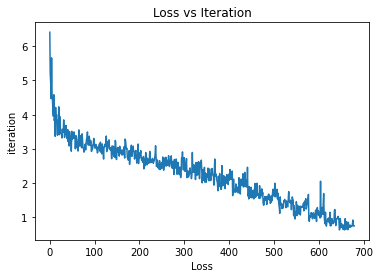

In [12]:
model_training(train_loader_23)

In [24]:
#Reset output array
tempor = []
model_testing(test_loader_1)

Test Accuracy of the model on the test images: 13.255240443896424 %


0.0372673374863226 36.6040988049402 0.038846461081218295 -1.4141119811633027


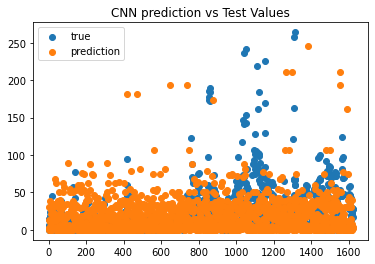

In [28]:
y_pred = []
for i in range(len(tempor)):
    y_pred.extend(tempor[i].tolist())

RMSE = np.sqrt(metrics.mean_squared_error(y_pred, YTEST1))
p_corr, _ = pearsonr(y_pred, YTEST1)
s_corr, _ = spearmanr(y_pred, YTEST1)
R2 = sklearn.metrics.r2_score(y_pred, YTEST1)

print('Pearson, RMSE, S_corr, R2')
print(p_corr,RMSE,s_corr,R2)

#Plot Graph 

x_axis = np.linspace(0,len(YTEST1),1622)

plt.title("CNN prediction vs Test Values Fold 1")
plt.scatter(x_axis,YTEST1, label='true')
plt.scatter(x_axis,y_pred, label='prediction')
plt.legend(loc='upper left')
plt.show()


## Conclusion of CNN

The following are the results of the model and its accuracies in summary, with the corresponding 3-Folds testing and training. It can be seen that more implementation of famous convolutional neural network, such as VGG could be implemented and observed furter its performance in this regression-like problem. Thus, personally, i find it hard to transform the images, which might be beneficial to pretransform the images beforehand. 


| FoldTest | Model | Accuracy | Pearson Correlation | RMSE | Spearman Correlation | R2 |
| --- | --- | --- | --- | --- | --- | --- |
| Fold1 | CNN | 15.6 % | -0.014 | 43.28 | -0.0165 | -0.853 |
| Fold2 | CNN | 14.6 % | -0.027 | 41.62 | -0.047  | -1.969 |
| Fold3 | CNN | 16.7 % | 0.026 | 38.3 | 0.008 | -1.31 |

## Run Train and Test on Other Cell Types Count 

I had to redefine the CNN due to some clashes of data, so it will be a bad practice to do so, however i am trying my best. 

In [19]:
# Define New CNN with different class and epochs, transfer here for ease of debugging
num_epochs = 20
num_classes = 253
batch_size = 128
learning_rate = 0.001

# Convolutional neural network (two convolutional layers), set classes to train data of 155
class ConvNet(nn.Module):
    def __init__(self, num_classes=253):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(4096, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

In [20]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Loss = []

# Function to Train the Model
def model_training(train_data):
    total_step = len(train_data)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_data):
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            print(i)
            
            Loss.append(loss.item())

            if (i+1) % 10 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        
    #Plot the function 
    
    plt.title('Loss vs Iteration')
    plt.plot(Loss)
    plt.xlabel("Loss")
    plt.ylabel("iteration")


In [21]:
# Test the model

tempor = []
def model_testing(test_data):
    model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_data:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            tempor.append(predicted)

        print('Test Accuracy of the model on the test images: {} %'.format(100 * correct / total))

    # Save the model checkpoint
    torch.save(model.state_dict(), 'model.ckpt')

In [22]:
# Function To evaluate
def model_eval(YT):
    y_pred = []
    for i in range(len(tempor)):
        y_pred.extend(tempor[i].tolist())

    RMSE = np.sqrt(metrics.mean_squared_error(y_pred, YT))
    p_corr, _ = pearsonr(y_pred, YT)
    s_corr, _ = spearmanr(y_pred, YT)
    R2 = sklearn.metrics.r2_score(y_pred, YT)
    
    print('Pearson, RMSE, S_corr, R2')
    print(p_corr,RMSE,s_corr,R2)

    #Plot Graph 
    
    Xlen = len(YT)

    x_axis = np.linspace(0,Xlen,Xlen)

    # Scatter Plot
    plt.title("CNN prediction vs Test Values T2")
    plt.scatter(x_axis,YT, label='true')
    plt.scatter(x_axis,y_pred, label='prediction')
    plt.legend(loc='upper left')
    plt.show()


## T1 Cell Count, set class to 51 manually to CNN function

In [36]:
XFOLD12_T1 = []
YFOLD12_T1 =[]
XTEST3_T1 = []
YTEST3_T1 =[]
T1 = []
for i in range (0,X.shape[0]):
    T1.append(Y['neutrophil'][i])
for i in index[0]:
    XFOLD12_T1.append(X[i]); YFOLD12_T1.append(T1[i])
for i in index[1]:
    XFOLD12_T1.append(X[i]); YFOLD12_T1.append(T1[i])
for i in index[2]:
    XTEST3_T1.append(X[i]); YTEST3_T1.append(T1[i])
print(len(YFOLD12_T1))

3373


In [37]:
%%time
a = torch.FloatTensor(XFOLD12_T1)
a = a.transpose(1,3)
b = torch.LongTensor(YFOLD12_T1)

train_ids_t1 = TensorDataset(a, b)
train_loader_t1 = DataLoader(dataset=train_ids_t1, batch_size = 100, shuffle = True)

Wall time: 2min 16s


In [38]:
%%time

k = torch.FloatTensor(XTEST3_T1)
k = k.transpose(1,3)
j = torch.LongTensor(YTEST3_T1)

test_ids_t1 = TensorDataset(k, j)
test_loader_t1 = DataLoader(dataset=test_ids_t1, batch_size = 100, shuffle = True)

Wall time: 1min 6s


0
1
2
3
4
5
6
7
8
9
Epoch [1/20], Step [10/34], Loss: 1.0873
10
11
12
13
14
15
16
17
18
19
Epoch [1/20], Step [20/34], Loss: 1.1260
20
21
22
23
24
25
26
27
28
29
Epoch [1/20], Step [30/34], Loss: 0.7840
30
31
32
33
0
1
2
3
4
5
6
7
8
9
Epoch [2/20], Step [10/34], Loss: 0.9372
10
11
12
13
14
15
16
17
18
19
Epoch [2/20], Step [20/34], Loss: 1.3257
20
21
22
23
24
25
26
27
28
29
Epoch [2/20], Step [30/34], Loss: 0.8908
30
31
32
33
0
1
2
3
4
5
6
7
8
9
Epoch [3/20], Step [10/34], Loss: 1.0583
10
11
12
13
14
15
16
17
18
19
Epoch [3/20], Step [20/34], Loss: 1.0716
20
21
22
23
24
25
26
27
28
29
Epoch [3/20], Step [30/34], Loss: 0.7855
30
31
32
33
0
1
2
3
4
5
6
7
8
9
Epoch [4/20], Step [10/34], Loss: 0.9403
10
11
12
13
14
15
16
17
18
19
Epoch [4/20], Step [20/34], Loss: 0.9094
20
21
22
23
24
25
26
27
28
29
Epoch [4/20], Step [30/34], Loss: 0.7855
30
31
32
33
0
1
2
3
4
5
6
7
8
9
Epoch [5/20], Step [10/34], Loss: 0.8359
10
11
12
13
14
15
16
17
18
19
Epoch [5/20], Step [20/34], Loss: 1.2581
20
21
22

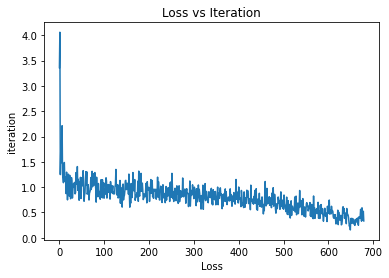

In [39]:
model_training(train_loader_t1)

Test Accuracy of the model on the test images: 77.11442786069652 %
0.007847898880316225 2.4148431960878005 0.04033400653167744 -0.820900053727738


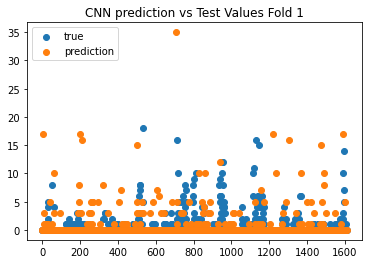

In [45]:
tempor = []
model_testing(test_loader_t1)
model_eval(YTEST3_T1)

## T2 Cell Count, set class to 253

In [13]:
print(Y['epithelial'].max())

253


In [15]:
XFOLD12_T2 = []
YFOLD12_T2 =[]
XTEST3_T2 = []
YTEST3_T2 =[]
T2 = []
for i in range (0,X.shape[0]):
    T2.append(Y['epithelial'][i])
for i in index[0]:
    XFOLD12_T2.append(X[i]); YFOLD12_T2.append(T2[i])
for i in index[1]:
    XFOLD12_T2.append(X[i]); YFOLD12_T2.append(T2[i])
for i in index[2]:
    XTEST3_T2.append(X[i]); YTEST3_T2.append(T2[i])

In [16]:
%%time
a = torch.FloatTensor(XFOLD12_T2)
a = a.transpose(1,3)
b = torch.LongTensor(YFOLD12_T2)

train_ids_t2 = TensorDataset(a, b)
train_loader_t2 = DataLoader(dataset=train_ids_t2, batch_size = 100, shuffle = True)

Wall time: 2min 20s


In [17]:
%%time

k = torch.FloatTensor(XTEST3_T2)
k = k.transpose(1,3)
j = torch.LongTensor(YTEST3_T2)

test_ids_t2 = TensorDataset(k, j)
test_loader_t2 = DataLoader(dataset=test_ids_t2, batch_size = 100, shuffle = True)

Wall time: 1min 7s


In [ ]:
model_training(train_loader_t2)  ERROR

# Conclusion

This is the end of the classification, so far, this project has explored method to extract features from cell counts and applying a regression function. However, there are more aspects to explore. The next following thing to do is to apply transform to the images, finding out the most transform that could extract the most personified features from convolution. Furthermore, evaluating the depth and complexity of the activation function and the type of neural network. Furthermore, transfer learning could also be implemented further in this problem.

The proposed CNN has been able to have a performance score of 77% in detecting neutrophil (T1), with RMSE of 2.414, and this is the only feasible capability of the CNN. It could be predicted that smaller classes might predict better for this CNN. For the following cell types, the program has crashed, due to probably more classes of trained images are fed. 